In [1]:
import pandas as pd

df = pd.read_csv('Online Payment Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Data Quality Report

In [33]:
#For the feature types 
type = pd.DataFrame(df.dtypes, columns= ['type'])

Missing_values = df.isnull().sum()
Missing_values = pd.DataFrame(Missing_values, columns=['Missing_Values'])

#unique values
b = df.columns
a = []
for i in range(len(b)):
    a.append(len(df[b[i]].unique()))
    
Unique_Values = pd.DataFrame(a,b, columns = ['Unique_Values'])

#Max
m = []
for i in range(len(b)):
    m.append(df[b[i]].max())
    
Maximum_values = pd.DataFrame(m,b, columns = ['Maximum_values'])

#Min
n = []
for i in range(len(b)):
    n.append(df[b[i]].min())
    
Minimum_values = pd.DataFrame(n,b, columns = ['Minimum_values'])


report = type.join(Unique_Values).join(Missing_values).join(Maximum_values).join(Minimum_values)
report

,type,Unique_Values,Missing_Values,Maximum_values,Minimum_values
step,int64,743,0,743,1
type,object,5,0,TRANSFER,CASH_IN
amount,float64,5316900,0,92445516.64,0.0
nameOrig,object,6353307,0,C999999784,C1000000639
oldbalanceOrg,float64,1845844,0,59585040.37,0.0
newbalanceOrig,float64,2682586,0,49585040.37,0.0
nameDest,object,2722362,0,M999999784,C1000004082
oldbalanceDest,float64,3614697,0,356015889.35,0.0
newbalanceDest,float64,3555499,0,356179278.92,0.0
isFraud,int64,2,0,1,0


# Experiments

In [48]:
df['Balance'] = df['oldbalanceOrg'] == df['newbalanceOrig']
df['amountDest'] = df['newbalanceDest'] - df['oldbalanceDest']

In [50]:
df.sort_values('Balance', ascending = False).head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Balance,amountDest
3181310,239,CASH_OUT,64425.92,C846324167,0.0,0.0,C2127689854,541170.89,605596.80,0,0,True,64425.91
4315991,308,CASH_OUT,519182.13,C2100357726,0.0,0.0,C8269543,2708366.11,3227548.24,0,0,True,519182.13
4315986,308,CASH_OUT,65116.43,C861189173,0.0,0.0,C254003125,137145.25,202261.69,0,0,True,65116.44
4315987,308,CASH_OUT,135040.07,C83163325,0.0,0.0,C1220305116,1253441.55,1388481.62,0,0,True,135040.07
3048238,234,PAYMENT,648.64,C3130591,0.0,0.0,M292254427,0.00,0.00,0,0,True,0.00
4315988,308,CASH_OUT,88755.27,C1028894319,0.0,0.0,C1389827195,402699.87,491455.14,0,0,True,88755.27
4315989,308,CASH_OUT,123596.07,C1212227590,0.0,0.0,C1863730960,389349.53,512945.60,0,0,True,123596.07
4315990,308,CASH_OUT,133640.97,C1587728423,0.0,0.0,C975874043,2672099.38,2805740.35,0,0,True,133640.97
4315992,308,CASH_OUT,294966.13,C1563431745,0.0,0.0,C834981238,842157.28,1137123.41,0,0,True,294966.13
4315984,308,CASH_OUT,50586.46,C1247700996,0.0,0.0,C602875728,267359.16,317945.62,0,0,True,50586.46


# Visualisation

# Preprocessing

In [2]:
df = df.drop(columns=['newbalanceOrig','newbalanceDest','isFlaggedFraud'])

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


labelencoder=LabelEncoder()
scaler = MinMaxScaler()

dataset = df.select_dtypes('object').columns
for i in range (len(dataset)):
    df[dataset[i]] = labelencoder.fit_transform(df[dataset[i]])
df[['type','nameOrig','nameDest']]

,type,nameOrig,nameDest
0,3,757869,1662094
1,3,2188998,1733924
2,4,1002156,439685
3,1,5828262,391696
4,3,3445981,828919
...,...,...,...
6362615,1,5651847,505863
6362616,4,1737278,260949
6362617,1,533958,108224
6362618,4,2252932,319713


In [4]:
flo = df.select_dtypes('float64').columns
scaler.fit(df[flo])
df[flo] = scaler.transform(df[flo])

In [5]:
inte =df.select_dtypes('int64').columns
df[inte]
scaler.fit(df[inte])
df[inte] = scaler.transform(df[inte])
display(df[inte], df[flo])

,step,isFraud
0,0.0,0.0
1,0.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,0.0
...,...,...
6362615,1.0,1.0
6362616,1.0,1.0
6362617,1.0,1.0
6362618,1.0,1.0


,amount,oldbalanceOrg,oldbalanceDest
0,0.000106,0.002855,0.000000
1,0.000020,0.000357,0.000000
2,0.000002,0.000003,0.000000
3,0.000002,0.000003,0.000059
4,0.000126,0.000697,0.000000
...,...,...,...
6362615,0.003674,0.005701,0.000000
6362616,0.068272,0.105923,0.000000
6362617,0.068272,0.105923,0.000192
6362618,0.009195,0.014265,0.000000


# Balancing

In [6]:
df['isFraud'].value_counts()

0.0    6354407
1.0       8213
Name: isFraud, dtype: int64

In [7]:
x = df.iloc[:, : -1]
y = df['isFraud']

In [8]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
x, y = sm.fit_resample(x, y)
y.value_counts()

0.0    6354407
1.0    6354407
Name: isFraud, dtype: int64

# Model

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

## Random Forest

In [10]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf_clf = RandomForestClassifier()
rf_clf.fit(x_train, y_train)

y_pred_rf = rf_clf.predict(x_test)

print("Accuracy for Ramdom Forest:",rf_clf.score(x_test, y_test))

print(classification_report(y_test, y_pred_rf))

Accuracy for Ramdom Forest: 0.999251438305953
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   1904842
         1.0       1.00      1.00      1.00   1907803

    accuracy                           1.00   3812645
   macro avg       1.00      1.00      1.00   3812645
weighted avg       1.00      1.00      1.00   3812645

CPU times: total: 1h 22s
Wall time: 1h 5min 36s


# Feature Selection

<AxesSubplot: >

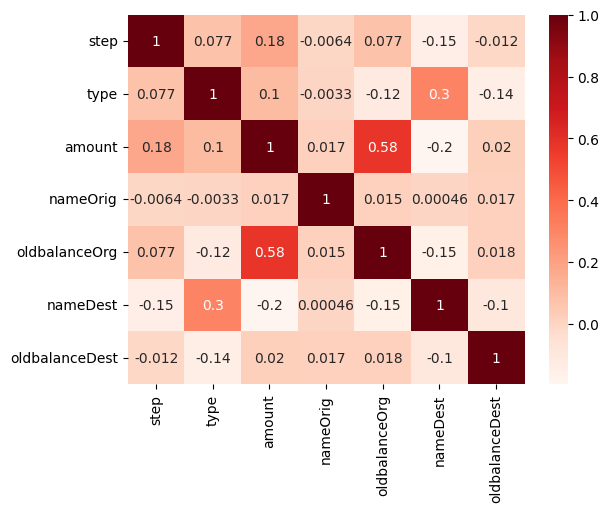

In [9]:
import seaborn as sns

heatmap = sns.heatmap(x.corr(),cmap='Reds',annot=True)
heatmap

Graphical representation of relevance of features for prediction:


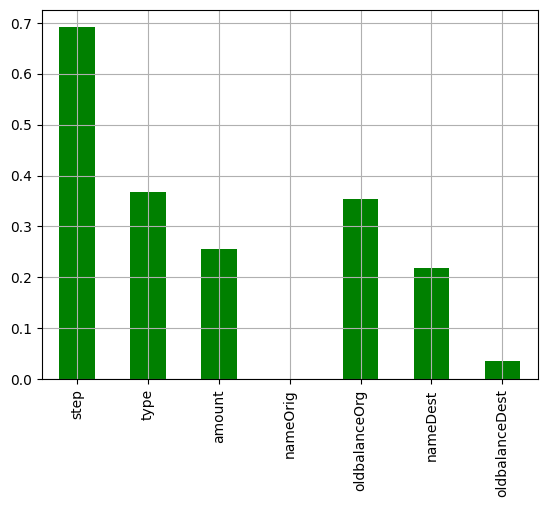

Tabular representation of the above graph:
step              0.690982
type              0.368108
amount            0.255689
nameOrig          0.000000
oldbalanceOrg     0.354093
nameDest          0.218089
oldbalanceDest    0.036478
dtype: float64


In [10]:
from sklearn. feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

fi = pd.Series (mutual_info_classif(x, y), x.columns[0:])
fi.plot (kind='bar', color="g", grid='boolean')
print("Graphical representation of relevance of features for prediction:")
plt.show()
print("Tabular representation of the above graph:")
print(fi)

In [11]:
x1 = x[fi[fi>0.3].index]
x1.shape

(12708814, 3)

# After Feature Selection

In [12]:
from sklearn.model_selection import train_test_split

x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y, test_size=0.3)

In [16]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf_clf = RandomForestClassifier()

rf_clf.fit(x_train1, y_train1)

y_pred_rf1 = rf_clf.predict(x_test1)

print("Accuracy for Ramdom Forest:",rf_clf.score(x_test1, y_test1))

print(classification_report(y_test1, y_pred_rf1))

Accuracy for Ramdom Forest: 0.9595288834916442
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96   1904912
         1.0       0.98      0.94      0.96   1907733

    accuracy                           0.96   3812645
   macro avg       0.96      0.96      0.96   3812645
weighted avg       0.96      0.96      0.96   3812645

CPU times: total: 42min 21s
Wall time: 44min 22s


In [15]:
x2 = x[fi[fi>0.2].index]
x2.shape

(12708814, 5)

In [16]:
from sklearn.model_selection import train_test_split

x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y, test_size=0.3)

In [17]:
%%time
rf_clf.fit(x_train2, y_train2)

y_pred_rf2 = rf_clf.predict(x_test2)

print("Accuracy for Ramdom Forest:",rf_clf.score(x_test2, y_test2))

print(classification_report(y_test2, y_pred_rf2))

Accuracy for Ramdom Forest: 0.9986473957056059
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   1906534
         1.0       1.00      1.00      1.00   1906111

    accuracy                           1.00   3812645
   macro avg       1.00      1.00      1.00   3812645
weighted avg       1.00      1.00      1.00   3812645

CPU times: total: 1h 4min 40s
Wall time: 1h 8min 26s
